In [23]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=141584 sha256=3adda1b59a3aa717a9bd605e832e14d756a7a265ef24948c4b45b182dea23678
  Stored in directory: /tmp/pip-ephem-wheel-cache-rvb72_qb/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Temporal Network Analysis: High School Dataset, Interactions among Students

First, we download and parse the [High School 2013 dataset](http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/). It is the temporal network of interactions between students of 5 classes during 7 days in a high school in Marseille, France in 2013. An interaction consists in a physical proximity between two students, captured by a sensor.

In [3]:
import urllib.request
import gzip

def download(url, file_name):
    # get request
    with urllib.request.urlopen(url) as response:
        # uncompress file
        with gzip.GzipFile(fileobj=response) as uncompressed, open(file_name, 'wb') as out_file:
            file_content = uncompressed.read()
            out_file.write(file_content)

In [4]:
url = "http://www.sociopatterns.org/wp-content/uploads/2015/07/High-School_data_2013.csv.gz"
file_name = "high_school_2013.csv"
download(url, file_name)

In [5]:
entry_format = {"u_pos": 1, "v_pos": 2, "t_pos": 0}
config = {"delimiter": " ", "ignore_header": False, "nodes_to_label": True, "time_is_datetime": False,
          "link_duration": 60, "is_link_stream": True}
sg.sort_csv(file_name, entry_format, **config)
S = sg.parser(input_file=file_name,
           input_format='csv',
           entry_format=entry_format,
           output_file="high_school_2013",
           output_format='sg',
           **config)

Writing CSV: 100%|█████████████████| 188508/188508 [00:00<00:00, 1171700.32it/s]
Parsing CSV: 188508it [00:00, 436070.71it/s]                                    


In [6]:
#sigmasv_links.sg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import straph as sg
import straph.betweenness as bt
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "latapy_test_intro_nodes.sg",
                      path_links=path_directory + "latapy_test_intro_links.sg")
S.describe()

Nb of Nodes :  5
Nb of segmented nodes :  5.0
Nb of links :  12
Nb of segmented links :  32.0
Nb of event times :  26


In [15]:
import numpy
T = [0, 50]
nb_node = 30
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15
p_link = numpy.sqrt(nb_node)/nb_node
S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  30
Nb of segmented nodes :  37.0
Nb of links :  73
Nb of segmented links :  102.0
Nb of event times :  178


<AxesSubplot:xlabel='t', ylabel='Nodes'>

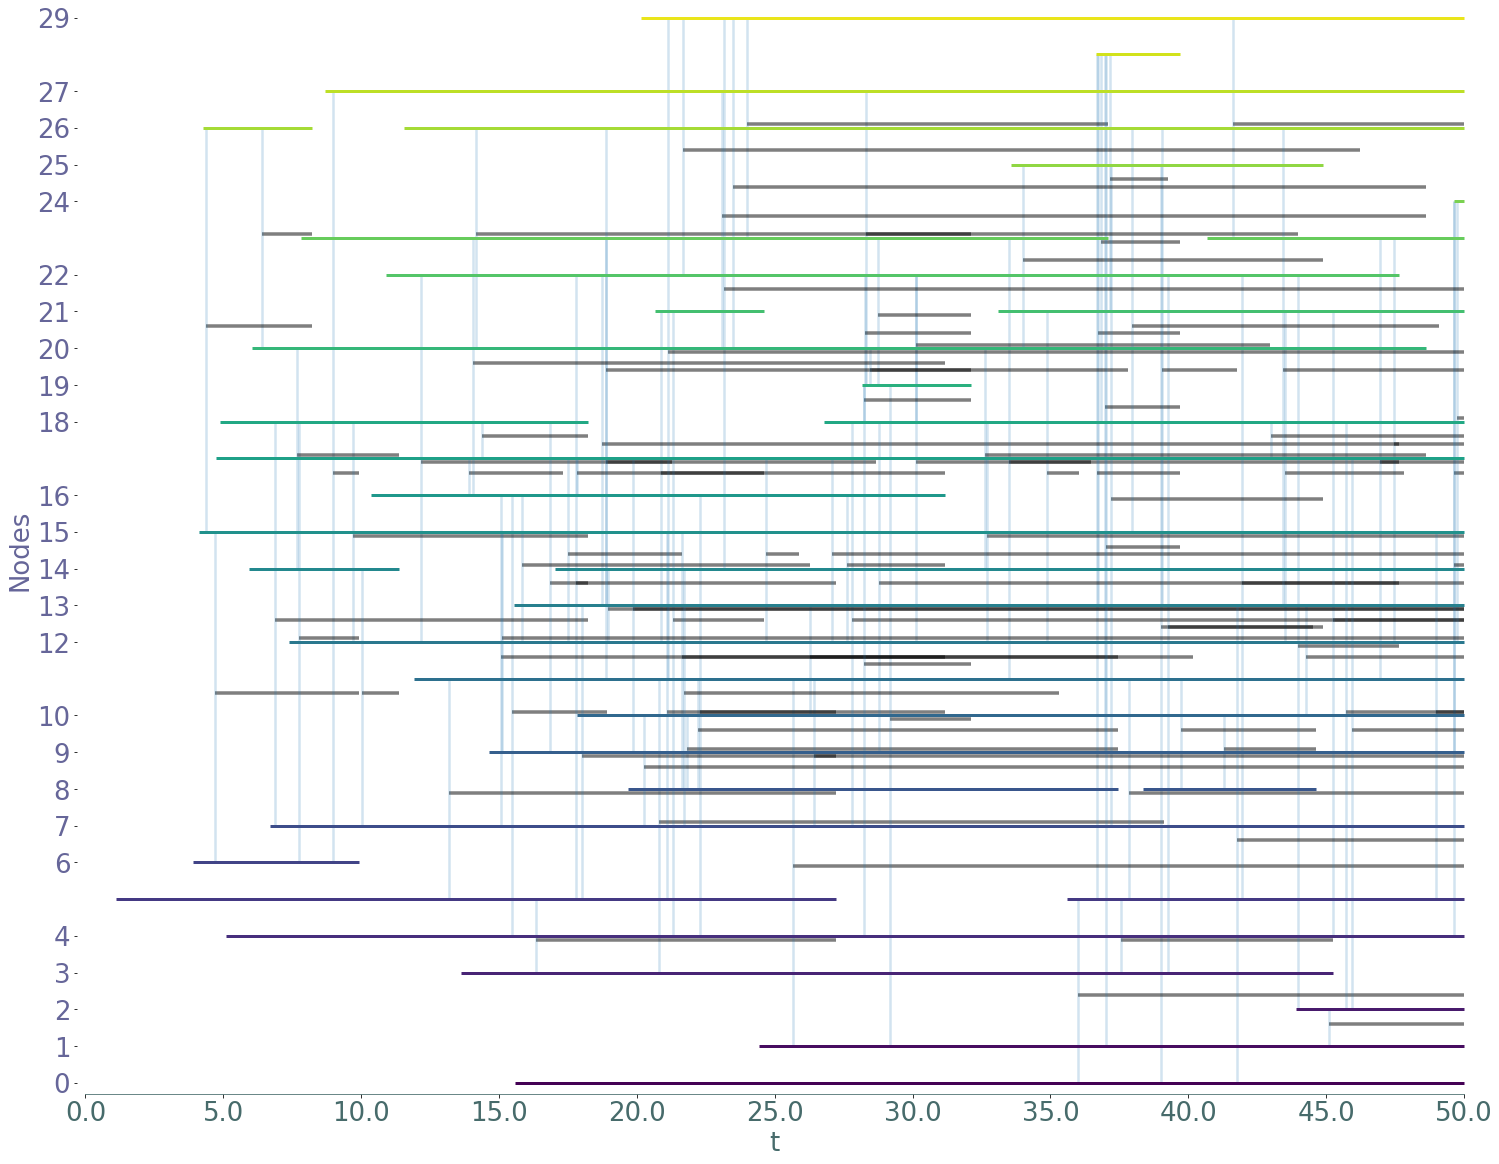

In [16]:
S.plot()

In [17]:
import straph.betweenness as bt
bet, contri, nouveau, events= bt.betweenness_all(S)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [18]:
bet

{0: {1.124326699477468: 0,
  3.8916215590385663: 0,
  4.107560873385147: 0,
  4.26718209448878: 0,
  4.389846211796801: 0,
  4.69812616304653: 0,
  4.74685623569307: 0,
  4.886287853372301: 0,
  5.080862575874856: 0,
  5.946630132056979: 0,
  6.044102178544692: 0,
  6.395678272995488: 0,
  6.679161811859507: 0,
  6.869607013614336: 0,
  7.394381428759061: 0,
  7.683276163397809: 0,
  7.743641808215136: 0,
  7.82405055988411: 0,
  8.228206527043842: 0,
  8.692448270416087: 0,
  8.964602572703317: 0,
  9.708220845797165: 0,
  9.939566291188301: 0,
  10.036849447202464: 0,
  10.343931462203765: 0,
  10.904986290277213: 0,
  11.376690100986291: 0,
  11.538003493738348: 0,
  11.93318731002479: 0,
  12.173844029074196: 0,
  13.197239980733686: 0,
  13.612006320844333: 0,
  13.91088651809719: 0,
  14.056428317544883: 0,
  14.167283466239368: 0,
  14.397190080030036: 0,
  14.638707853984245: 0,
  15.073900380582973: 0,
  15.109649743022047: 0,
  15.475406469125712: 0,
  15.550055160966615: 0,


Let's print a short description of this dataset.

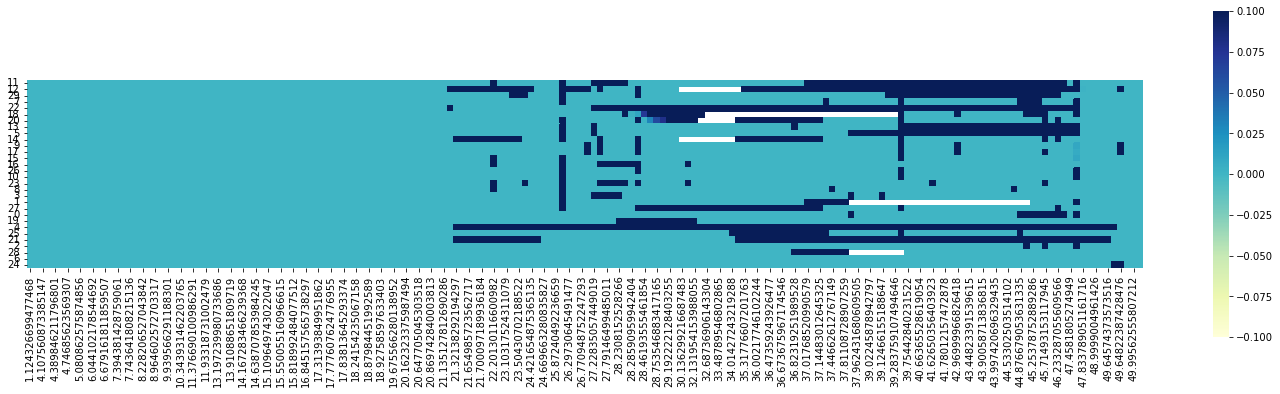

In [19]:
ax = bt.heatmap_betweenness(nouveau, events, bet)
fig = ax.get_figure()
fig.savefig("out.png") 

There's $327$ students interacting $46025$ times among each other at $7360$ distinct event times. Let's learn more.

In [ ]:
import os
os.remove("high_school_2013.csv")